# Module 6

In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## create random set of coordinates

In [22]:
# Create a set of random latitude and longitude combinations.
# assign the arrays to variables so we can access them later
# zip the variables together so they are paired

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [23]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [24]:
from citipy import citipy

In [25]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

643

## Get city weather data for each coordinate

In [26]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [27]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [28]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [29]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes. Use i % 50 mod function.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | norman wells
Processing Record 2 of Set 1 | khandbari
Processing Record 3 of Set 1 | zeya
Processing Record 4 of Set 1 | raymond
Processing Record 5 of Set 1 | ucluelet
Processing Record 6 of Set 1 | rungata
City not found. Skipping...
Processing Record 7 of Set 1 | halifax
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | krasnoyarka
Processing Record 12 of Set 1 | thilogne
City not found. Skipping...
Processing Record 13 of Set 1 | geraldton
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | bumba
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | port-cartier
Processing Record 21 of Set 1 

Processing Record 40 of Set 4 | whitehorse
Processing Record 41 of Set 4 | henties bay
Processing Record 42 of Set 4 | aklavik
Processing Record 43 of Set 4 | college station
Processing Record 44 of Set 4 | lolua
City not found. Skipping...
Processing Record 45 of Set 4 | boddam
Processing Record 46 of Set 4 | spornoye
Processing Record 47 of Set 4 | rochegda
Processing Record 48 of Set 4 | kibre mengist
Processing Record 49 of Set 4 | mariakani
Processing Record 50 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 1 of Set 5 | praia
Processing Record 2 of Set 5 | east london
Processing Record 3 of Set 5 | iquique
Processing Record 4 of Set 5 | danville
Processing Record 5 of Set 5 | tazovskiy
Processing Record 6 of Set 5 | hamilton
Processing Record 7 of Set 5 | ostrovnoy
Processing Record 8 of Set 5 | nanortalik
Processing Record 9 of Set 5 | yellowknife
Processing Record 10 of Set 5 | kijang
Processing Record 11 of Set 5 | general roca
Processing Record 12 of Set 5 

Processing Record 27 of Set 8 | kesennuma
City not found. Skipping...
Processing Record 28 of Set 8 | bowen
Processing Record 29 of Set 8 | ahuimanu
Processing Record 30 of Set 8 | strezhevoy
Processing Record 31 of Set 8 | yeniseysk
Processing Record 32 of Set 8 | flagstaff
Processing Record 33 of Set 8 | talcahuano
Processing Record 34 of Set 8 | fonte boa
Processing Record 35 of Set 8 | wilhelmshaven
Processing Record 36 of Set 8 | venice
Processing Record 37 of Set 8 | norrtalje
Processing Record 38 of Set 8 | nieuw amsterdam
Processing Record 39 of Set 8 | saint-augustin
Processing Record 40 of Set 8 | nome
Processing Record 41 of Set 8 | te anau
Processing Record 42 of Set 8 | tsumeb
Processing Record 43 of Set 8 | gornopravdinsk
Processing Record 44 of Set 8 | nsanje
Processing Record 45 of Set 8 | matagami
Processing Record 46 of Set 8 | taree
Processing Record 47 of Set 8 | goure
Processing Record 48 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 49 of Set 

Processing Record 15 of Set 12 | alice springs
Processing Record 16 of Set 12 | toamasina
Processing Record 17 of Set 12 | aitape
Processing Record 18 of Set 12 | lamu
Processing Record 19 of Set 12 | ijaki
City not found. Skipping...
Processing Record 20 of Set 12 | roma
Processing Record 21 of Set 12 | aviles
Processing Record 22 of Set 12 | brighton
Processing Record 23 of Set 12 | minturno
Processing Record 24 of Set 12 | ibra
Processing Record 25 of Set 12 | ahipara
Processing Record 26 of Set 12 | porto novo
Processing Record 27 of Set 12 | sinnamary
Processing Record 28 of Set 12 | soto la marina
Processing Record 29 of Set 12 | san pedro
Processing Record 30 of Set 12 | khandyga
Processing Record 31 of Set 12 | puerto escondido
Processing Record 32 of Set 12 | el sauce
Processing Record 33 of Set 12 | okhotsk
Processing Record 34 of Set 12 | college
Processing Record 35 of Set 12 | santa isabel do rio negro
Processing Record 36 of Set 12 | osypenko
Processing Record 37 of Set 1

In [31]:
len(city_data)


594

# Convert weather data to Pandas DF

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.

# city_data_df = pd.DataFrame(city_data)

# city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Norman Wells,CA,2022-07-18 20:01:30,65.2820,-126.8329,73.98,46,100,4.76
1,1,Khandbari,NP,2022-07-18 20:01:30,27.3747,87.2039,73.24,95,100,0.51
2,2,Zeya,RU,2022-07-18 19:56:46,53.7500,127.2667,61.99,94,100,2.80
3,3,Raymond,US,2022-07-18 20:01:32,43.9015,-70.4703,75.15,82,100,6.24
4,4,Ucluelet,CA,2022-07-18 20:01:33,48.9329,-125.5528,60.10,87,96,1.01
5,5,Halifax,CA,2022-07-18 20:01:34,44.6453,-63.5724,78.49,71,79,8.99
6,6,Punta Arenas,CL,2022-07-18 19:58:32,-53.1500,-70.9167,41.11,75,20,31.07
7,7,Mahebourg,MU,2022-07-18 20:01:36,-20.4081,57.7000,69.26,73,75,18.41
8,8,Krasnoyarka,RU,2022-07-18 20:01:37,55.3333,73.1167,64.35,77,74,8.90
9,9,Geraldton,AU,2022-07-18 20:01:38,-28.7667,114.6000,54.01,94,40,8.05


In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Norman Wells,CA,2022-07-18 20:01:30,65.2820,-126.8329,73.98,46,100,4.76
1,Khandbari,NP,2022-07-18 20:01:30,27.3747,87.2039,73.24,95,100,0.51
2,Zeya,RU,2022-07-18 19:56:46,53.7500,127.2667,61.99,94,100,2.80
3,Raymond,US,2022-07-18 20:01:32,43.9015,-70.4703,75.15,82,100,6.24
4,Ucluelet,CA,2022-07-18 20:01:33,48.9329,-125.5528,60.10,87,96,1.01


In [9]:
# Save DataFrame to output file
output_data_file = "weather_data/cities.csv"

#Export the city_data_df to a csv.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

# Create plots to showcase weather parameters


In [10]:
# Read city data from CSV file so it doesnt keep changing if the whole program runs again.
city_data = "weather_data/cities.csv"
city_data_df = pd.read_csv(city_data)

# extract relevant columns from DF for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

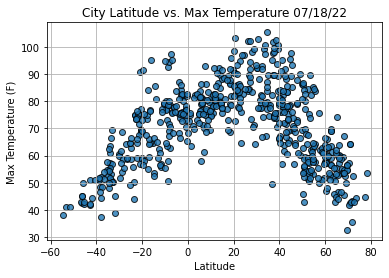

In [12]:
# Import time module
import time

# build scatter plot for lat vs temp
plt.scatter(lats, max_temps,
           edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()           

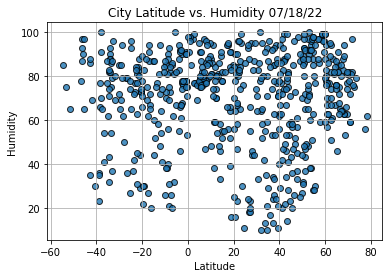

In [14]:
# Scatter plot for lat vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig2.png")

# show plot
plt.show()

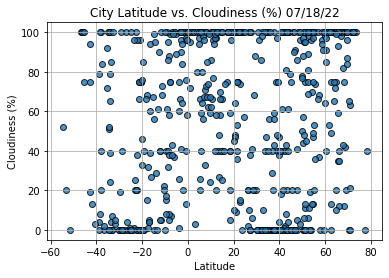

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

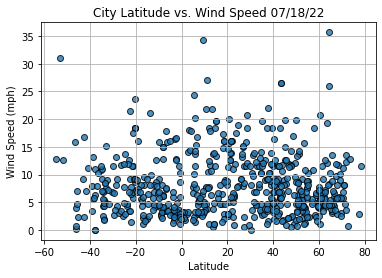

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()